### Size of the dynamic arrays used for lists in python

In [3]:
# some utility classes

class Empty(Exception):
    pass

In [4]:
import sys

data = []
n = 100
old_size = 0
for i in range(n):
    print(f'Length: {len(data)},'
          f'Size in bytes: {sys.getsizeof(data)},'
          f'Size in bytes: {sys.getsizeof(data) - old_size}')
    old_size = sys.getsizeof(data)
    data.append(1)

Length: 0,Size in bytes: 56,Size in bytes: 56
Length: 1,Size in bytes: 88,Size in bytes: 32
Length: 2,Size in bytes: 88,Size in bytes: 0
Length: 3,Size in bytes: 88,Size in bytes: 0
Length: 4,Size in bytes: 88,Size in bytes: 0
Length: 5,Size in bytes: 120,Size in bytes: 32
Length: 6,Size in bytes: 120,Size in bytes: 0
Length: 7,Size in bytes: 120,Size in bytes: 0
Length: 8,Size in bytes: 120,Size in bytes: 0
Length: 9,Size in bytes: 184,Size in bytes: 64
Length: 10,Size in bytes: 184,Size in bytes: 0
Length: 11,Size in bytes: 184,Size in bytes: 0
Length: 12,Size in bytes: 184,Size in bytes: 0
Length: 13,Size in bytes: 184,Size in bytes: 0
Length: 14,Size in bytes: 184,Size in bytes: 0
Length: 15,Size in bytes: 184,Size in bytes: 0
Length: 16,Size in bytes: 184,Size in bytes: 0
Length: 17,Size in bytes: 248,Size in bytes: 64
Length: 18,Size in bytes: 248,Size in bytes: 0
Length: 19,Size in bytes: 248,Size in bytes: 0
Length: 20,Size in bytes: 248,Size in bytes: 0
Length: 21,Size in byte

### Growing dynamic arrays by doubling the size

[2, 4, 8, 16]
[1, 2, 1, 4, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 16]


Text(0, 0.5, 'Number of operations')

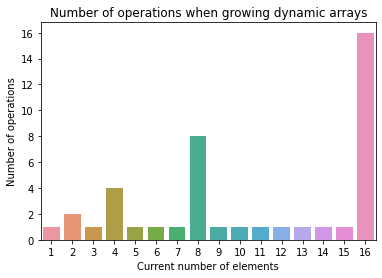

In [5]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

n = 16
overflows = [2 ** i for i in range(1, int(math.log(n, 2) + 1))]
print(overflows)

operations = []
for i in range(1, n + 1):
    if i in overflows:
        operations.append(i)
    else:
        operations.append(1)

print(operations)
sns.barplot(x=list(range(1, n+1)), y=operations)
plt.title('Number of operations when growing dynamic arrays')
plt.xlabel('Current number of elements')
plt.ylabel('Number of operations')

### Amortized cost of list operations

1
10
100
1000
10000
100000
1000000
[[1, 3.1333183869719505e-07, 1.8705278511938227e-07], [10, 7.700019826491675e-08, 1.0488551279137582e-07], [100, 3.346664986262719e-08, 2.177311384029224e-09], [1000, 3.343999851495028e-08, 2.7744603463212454e-09], [10000, 3.299066661080965e-08, 1.0723541192618219e-08], [100000, 3.993759995015959e-08, 1.545589528768135e-08], [1000000, 5.3353186663783465e-08, 8.272498533512976e-09]]
[      1      10     100    1000   10000  100000 1000000]


Text(0, 0.5, 'time')

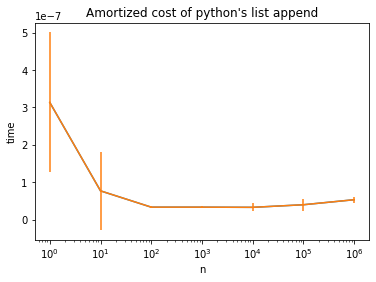

In [6]:
import timeit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def append_cost(n=100):
    data = []
    for i in range(n):
        data.append(None)


ns = [1, 10, 100, 1000, 10000, 100000, 1000000]
results = []
for n in ns:
    print(n)
    time = np.array(timeit.repeat('append_cost(n)', globals=globals(), number=1, repeat=30))
    time /= n
    results.append([n, np.mean(time), np.std(time, ddof=1)])

print(results)
df = pd.DataFrame(results, columns=['n', 'time', 'error'])
df.head()    

plot = sns.lineplot(data=df, x='n', y='time')
plot.set(xscale='log')
print(df.n.to_numpy())
plt.errorbar(df.n.to_numpy(), df.time.to_numpy(), yerr=df.error.to_numpy())
plt.title("Amortized cost of python's list append")
plt.xlabel('n')
plt.ylabel('time')

### Implementing stacks in python

In [7]:
class Stack:
    
    
    def __init__(self):
        self._data = []
        
        
    def __len__(self):
        return len(self._data)
    
    
    def is_empty(self):
        return len(self._data) == 0
    
    
    def push(self, e):
        self._data.append(e)
        
    
    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data[-1]
    
    
    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data.pop()
    
    
    def __str__(self):
        return f'{self._data}'

In [8]:
s = Stack()
s.pop() # this will raise an exception, because the stack is empty

Empty: Stack is empty

In [9]:
s.push(5)
s.push(3)
print(f'Length: {len(s)}')
print(f'Pop: {s.pop()}')
print(f'Empty: {s.is_empty()}')
print(f'Pop: {s.pop()}')
print(f'Empty: {s.is_empty()}')
s.push(7)
s.push(9)
print(f'Top: {s.top()}')
s.push(4)
print(f'Length: {len(s)}')
print(f'Pop: {s.pop()}')
s.push(6)
print(f'Stack: {s}')

Length: 2
Pop: 3
Empty: False
Pop: 5
Empty: True
Top: 9
Length: 3
Pop: 4
Stack: [7, 9, 6]


### Implementing queues in python

In [10]:
class Queue:
    
    
    DEFAULT_CAPACITY = 10
    
    
    def __init__(self):
        self._data = [None] * Queue.DEFAULT_CAPACITY
        self._size = 0
        self._front = 0
        
    
    def __len__(self):
        return self._size
    
    
    def is_empty(self):
        return self._size == 0
    
    
    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front]
    
    
    def dequeue(self):
        e = self.first()
        self._data[self._front] = None
        self._front = (self._front + 1) % len(self._data)
        self._size -= 1
        return e
    
    
    def enqueue(self, e):
        if self._size == len(self._data):
            self._resize(2 * len(self._data))
        back = (self._front + self._size) % len(self._data)
        self._data[back] = e
        self._size += 1
        
        
    def _resize(self, capacity):
        old = self._data
        self._data = [None] * capacity
        i = self._front
        for j in range(self._size):
            self._data[j] = old[i]
            i = (i + 1) % len(old)
        self._front = 0
    
    
    def __str__(self):
        return f'{self._data}'

In [11]:
q = Queue()
q.dequeue() # this will raise an exception, because the queue is empty

Empty: Queue is empty

In [12]:
q.enqueue(5)
q.enqueue(3)
print(f'Length: {len(q)}')
print(f'Dequeue: {q.dequeue()}')
print(f'Empty: {q.is_empty()}')
print(f'Dequeue: {q.dequeue()}')
print(f'Empty: {q.is_empty()}')
q.enqueue(7)
q.enqueue(9)
print(f'First: {q.first()}')
q.enqueue(4)
print(f'Length: {len(q)}')
print(f'Dequeue: {q.dequeue()}')
q.enqueue(6)
print(f'Queue: {q}')

Length: 2
Dequeue: 5
Empty: False
Dequeue: 3
Empty: True
First: 7
Length: 3
Dequeue: 7
Queue: [None, None, None, 9, 4, 6, None, None, None, None]


### Singly linked lists

In [37]:
class SinglyLinkedList:

    
    class _Node:
    
    
        def __init__(self, element):
            self._element = element
            self._next = None

    
    def __init__(self):
        self._head = None
        self._tail = None
        self._size = 0
    
    
    def add_first(self, element):
        new = self._Node(element)
        new._next = self._head
        self._head = new
        if self._size == 0:
            self._tail = new
        self._size += 1
        

    def add_last(self, element):
        new = self._Node(element)
        new._next = None
        if self._size > 0:
            self._tail._next = new
        else:
            self._head = new
        self._tail = new
        self._size += 1
    
    
    def remove_first(self):
        if self._size == 0:
            raise Empty('Singly linked list is empty')
        self._head = self._head._next
        self._size -= 1
    
    
    def is_empty(self):
        return self._size == 0
    
    
    def next(self, node=None):
        if node:
            return node._next
        else:
            return self._head
        
    
    def __len__(self):
        return self._size
    
    
    def __str__(self):
        result = '[ '
        node = self.next()
        while node:
            result += str(node._element) + ' '
            node = self.next(node)
        return result + ']'

In [39]:
list = SinglyLinkedList()
list.add_last(5)
list.add_last(10)
list.add_first(20)
print(list)
print(len(list))
print(list.is_empty())
list.remove_first()
list.remove_first()
list.remove_first()
print(list)
list.add_first(True)
print(list)

[ 20 5 10 ]
3
False
[ ]
[ True ]
